<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1: Familiarize yourself with the dataset 

#### The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [6]:
boston_df.info()
boston_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Task **2**: Generate Descriptive Statistics and Visualizations

### **2.1** For the "Median value of owner-occupied homes" provide a boxplot

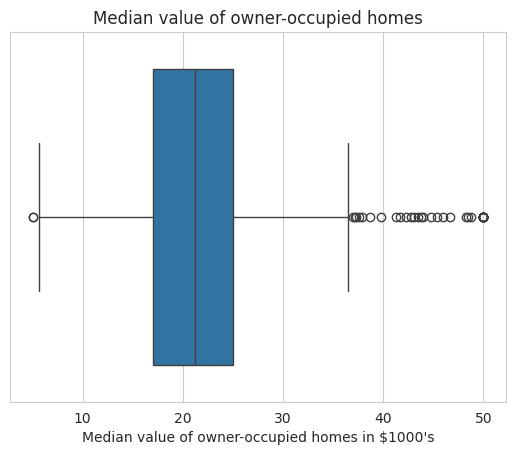

In [7]:
plot=sns.set_style("whitegrid")
ax=sns.boxplot(x=boston_df["MEDV"])
pyplot.title("Median value of owner-occupied homes")
pyplot.xlabel("Median value of owner-occupied homes in $1000's")
pyplot.show()

#### **Explanation:** The mean for MEDV is 22.532806, the median is 21.20000. There is an outlier, the min value 5.000000, and after the third quartile there are outlier values are greater than 35 (in thousands).

### **2.2** Provide a bar plot for the Charles river variable

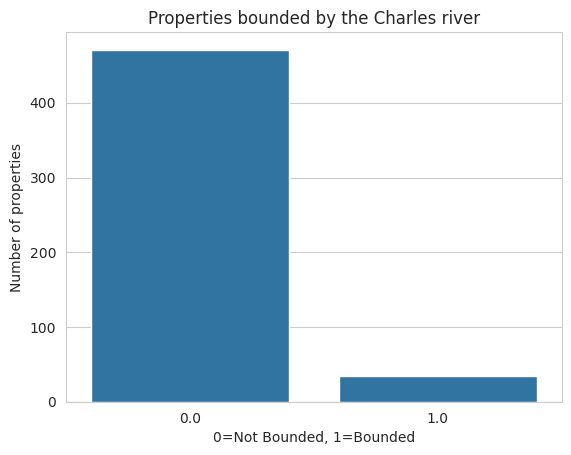

In [8]:
ax=sns.countplot(x="CHAS", data=boston_df)
pyplot.title('Properties bounded by the Charles river')
pyplot.xlabel("0=Not Bounded, 1=Bounded")
pyplot.ylabel("Number of properties")
pyplot.show()

#### **Explanation:** Most properties are not bounded by the Charles river.

### **2.3** Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

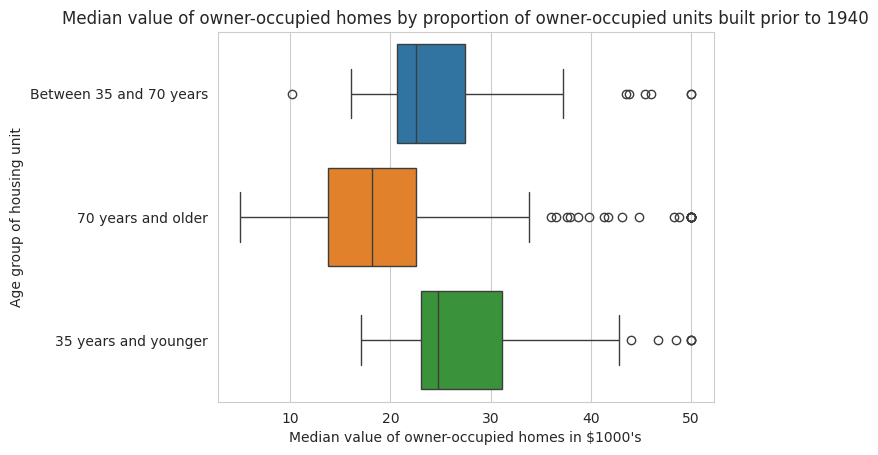

In [9]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'Between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

ax=sns.boxplot(x="MEDV", y="age_group", hue="age_group", data=boston_df)
pyplot.title("Median value of owner-occupied homes by proportion of owner-occupied units built prior to 1940")
pyplot.xlabel("Median value of owner-occupied homes in $1000's")
pyplot.ylabel("Age group of housing unit")
pyplot.show()

#### **Explanation:** Newer housing units tend to have a higher median value than older housing units.

### **2.4** Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

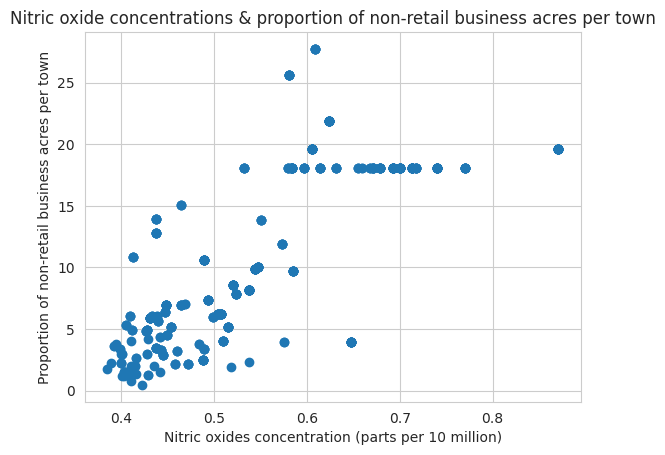

In [10]:
plot=pyplot.scatter(x="NOX", y="INDUS", data=boston_df)
pyplot.title("Nitric oxide concentrations & proportion of non-retail business acres per town")
pyplot.xlabel("Nitric oxides concentration (parts per 10 million)")
pyplot.ylabel("Proportion of non-retail business acres per town")
pyplot.show()

#### **Explanation:** There seems to be a direct (positive) relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.

### **2.5** Create a histogram for the pupil to teacher ratio variable

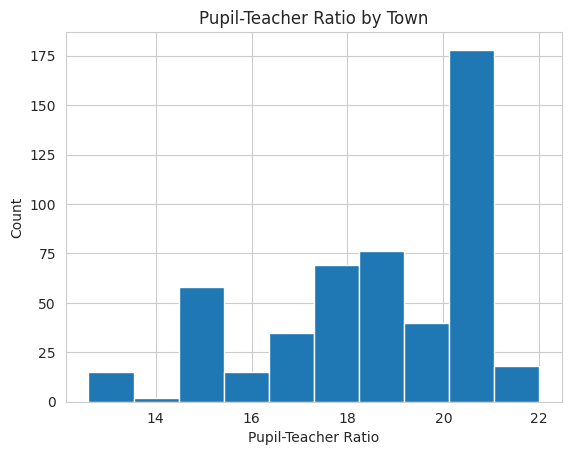

In [11]:
pyplot.hist(boston_df["PTRATIO"])
pyplot.title("Pupil-Teacher Ratio by Town")
pyplot.xlabel("Pupil-Teacher Ratio")
pyplot.ylabel("Count")
pyplot.show()

#### **Explanation:** The distribution of the pupil to teacher ratio variable is Left-Skewed (Negatively Skewed), as evidenced by a mean of 18, a median of 19.05, and a mode of 20.2.

# Task **3**: Use the appropriate tests to answer the questions provided.

### **3.1** Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#### **State the hypothesis**

*   $H\_0: µ\_1 = µ\_2$  **There is no difference in median value of houses bounded by the Charles river.**
*   $H\_1: µ\_1 ≠ µ\_2$  **There is a difference in median value of houses bounded by the Charles river.**

Use the <code>ttest_ind</code> from the <code>scipy_stats</code> library

In [37]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

#### **Conclusion:** Since the p-value is more than alpha value 0.05, we fail to reject the null hypothesis as there is not enough proof that there is a statistical difference in median value of houses bounded by the Charles river.

### **3.2** Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

#### **State the hypothesis**

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ **The median value of houses is equal for each housing unit age group.**
*   $H\_1:$ **At least one of the age group's median value of houses differs.**

**First, separate the three samples (one for each age group) into a variable each.**

In [40]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'Between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

**Now, run a one-way ANOVA.**

In [41]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


#### **Conclusion:** Since the p-value is more than alpha value 0.05, we fail to reject the null hypothesis as there is not enough proof that there is a statistical difference in median value of houses between the age groups of the proportion of owner-occupied units built prior to 1940.

### **3.3** Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

#### **State the hypothesis**

*   $H\_0:$ **NOX is not correlated with INDUS**
  
*   $H\_1:$ **NOX is correlated with INDUS**

In [43]:
pearson,p_value = scipy.stats.pearsonr(boston_df["NOX"],boston_df["INDUS"])
print("Pearson Coefficient value={0}, P-value={1}".format(pearson,p_value))

Pearson Coefficient value=0.7636514469209192, P-value=7.913361061210442e-98


#### **Conclusion:** Since the p-value is less than alpha value 0.05, the Null hypothesis is rejected; there exists a relationship between Nitric Oxide and non-retail business acres per town.

### **3.4** What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

#### **State Hypothesis**

*   $H\_0:$ **The weighted distances to the five Boston employment centres are not related to median value of owner occupied homes.**

*   $H\_1:$ **The weighted distances to the five Boston employment centres are related to median value of owner occupied homes.**

In [45]:
y = boston_df['MEDV']
x = boston_df['DIS']
x = sm.add_constant(x)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 05 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        23:41:17   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
np.sqrt(0.062)

0.24899799195977465

#### **Conclusion:** The square root of R-squared is 0.25, which implies a weak direct (positive) correlation between the weighted distances to the five Boston employment centres and the median value of owner occupied homes.